In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
%cd /content/drive/MyDrive/Cornell/CS5782

/content/drive/MyDrive/Cornell/CS5782


In [22]:
# Implementation script for Arithmetic Transformer
# This script will be converted to a notebook for Google Colab

# Cell 1: Setup and Installation
"""
# Investigating the Limitations of Transformers with Simple Arithmetic Tasks

This notebook implements the experiments from the paper:
[Nogueira, Jiang, Lin "Investigating the Limitations of Transformers with Simple Arithmetic Tasks", 2021](https://arxiv.org/abs/2102.13019)

It demonstrates how different number representations affect the ability of transformer models to learn arithmetic tasks.

## Setup
First, let's install the required packages and set up the environment.
"""

# Install required packages
!pip install -q torch pytorch-lightning transformers num2words numpy pandas matplotlib tqdm



In [23]:
!if [ ! -d "5782_Final_Project" ]; then git clone https://github.com/joshiarnav/5782_Final_Project.git; else cd "5782_Final_Project" && git pull; fi

# Navigate to the code directory
%cd 5782_Final_Project/code

remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 5 (delta 4), reused 5 (delta 4), pack-reused 0 (from 0)
Unpacking objects: 100% (5/5), 603 bytes | 17.00 KiB/s, done.
From https://github.com/joshiarnav/5782_Final_Project
   c369ff3..22ac1d4  main       -> origin/main
Updating c369ff3..22ac1d4
Fast-forward
 code/gpu_optimizations.py | 6 +++---
 code/train.py             | 2 +-
 2 files changed, 4 insertions(+), 4 deletions(-)
/content/drive/MyDrive/Cornell/CS5782/5782_Final_Project/code


In [24]:
# Cell 2: Import Libraries and Set Parameters
"""
## Configuration
Let's set up the configuration for training the model.
"""

import os
import json
import glob
import random
import numpy as np
import matplotlib.pyplot as plt
import torch
import pytorch_lightning as pl

# Set random seeds for reproducibility
SEED = 1
random.seed(SEED)
pl.seed_everything(SEED)
torch.manual_seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(SEED)

# Define training parameters
OUTPUT_DIR = './output'
MODEL_NAME = 't5-base'
OPERATION = 'addition'  # 'addition' or 'subtraction'
ORTHOGRAPHY = '10ebased'  # 'decimal', 'character', 'character_fixed', 'underscore', 'words', '10based', '10ebased'
# MAX_DIGITS_TRAIN = 5  # Reduced from 15 for faster training
# MAX_DIGITS_TEST = 5   # Reduced from 15 for faster training
MAX_DIGITS_TRAIN = 15  # Reduced from 15 for faster training
MAX_DIGITS_TEST = 15   # Reduced from 15 for faster training
# TRAIN_SIZE = 1000      # Reduced from 100000 for faster training
# VAL_SIZE = 200         # Reduced from 10000 for faster training
# TEST_SIZE = 200        # Reduced from 10000 for faster training
TRAIN_SIZE = 100000      # Reduced from 100000 for faster training
VAL_SIZE = 10000         # Reduced from 10000 for faster training
TEST_SIZE = 10000        # Reduced from 10000 for faster training
BATCH_SIZE = 128
# MAX_EPOCHS = 5         # Reduced from 20 for faster training
MAX_EPOCHS = 20         # Reduced from 20 for faster training

# Create output directory
os.makedirs(OUTPUT_DIR, exist_ok=True)

INFO:lightning_fabric.utilities.seed:Seed set to 1


In [25]:
# Cell 3: Run Training
"""
## Training
Now let's train the model using the specified parameters.
"""

# Construct the training command
train_command = f"""python train.py \
    --output_dir={OUTPUT_DIR} \
    --model_name_or_path={MODEL_NAME} \
    --operation={OPERATION} \
    --orthography={ORTHOGRAPHY} \
    --balance_train \
    --balance_val \
    --train_size={TRAIN_SIZE} \
    --val_size={VAL_SIZE} \
    --test_size={TEST_SIZE} \
    --min_digits_train=2 \
    --max_digits_train={MAX_DIGITS_TRAIN} \
    --min_digits_test=2 \
    --max_digits_test={MAX_DIGITS_TEST} \
    --base_number=10 \
    --seed={SEED} \
    --train_batch_size={BATCH_SIZE} \
    --accumulate_grad_batches=4 \
    --val_batch_size={BATCH_SIZE*4} \
    --max_seq_length=512 \
    --num_workers=2 \
    --optimizer=AdamW \
    --lr=3e-4 \
    --weight_decay=5e-5 \
    --scheduler=StepLR \
    --gamma=1.0 \
    --step_size=1000 \
    --max_epochs={MAX_EPOCHS} \
    --check_val_every_n_epoch=2 \
    --precision=32 \
    --gradient_clip_val=1.0"""

# Execute the training command
!{train_command}

Configuration: Namespace(output_dir='./output', operation='addition', orthography='10ebased', invert_question=False, invert_answer=False, balance_train=True, balance_val=True, balance_test=False, min_digits_train=2, min_digits_test=2, max_digits_train=15, max_digits_test=15, base_number=10, seed=1, train_size=100000, val_size=10000, test_size=10000, model_name_or_path='t5-base', max_seq_length=512, train_batch_size=128, val_batch_size=512, optimizer='AdamW', lr=0.0003, weight_decay=5e-05, scheduler='StepLR', gamma=1.0, step_size=1000, t_0=2, t_mult=2, num_workers=2, max_epochs=20, gpus=None, precision=32, accumulate_grad_batches=4, gradient_clip_val=1.0, check_val_every_n_epoch=1, amp_level='O1')
Seed set to 1
Seed set to 1
/content/drive/MyDrive/Cornell/CS5782/5782_Final_Project/code/gpu_optimizations.py:48: UserWarning: Enabled Tensor Core optimizations for NVIDIA A100-SXM4-40GB
  warnings.warn(f"Enabled Tensor Core optimizations for {device_name}")
/content/drive/MyDrive/Cornell/CS5

In [43]:
# !pip install Ipython --upgrade

In [7]:
%load_ext autoreload
%autoreload 2

In [8]:
# !pip install huggingface_hub[hf_xet]


In [9]:
# from tpu_runner import run_from_colab

# results = run_from_colab(
#     train_size=100000,
#     val_size=10000,
#     test_size=10000,
#     max_digits_train=15,
#     max_digits_test=15,
#     batch_size=64,
#     max_epochs=20
# )

In [10]:
# Cell 4: Evaluate Results
"""
## Results
Let's evaluate the results of our training.
"""

# Load results
results_file = os.path.join(OUTPUT_DIR, 'results.json')
if os.path.exists(results_file):
    with open(results_file, 'r') as f:
        results = json.load(f)
    print(f"Test Exact Match: {results['test_exact_match']:.4f}")

    # Display other metadata
    print(f"Operation: {results['operation']}")
    print(f"Orthography: {results['orthography']}")
    print(f"Max Digits (Train): {results['max_digits_train']}")
    print(f"Max Digits (Test): {results['max_digits_test']}")
else:
    print("No results file found. Training may have failed or is still in progress.")

No results file found. Training may have failed or is still in progress.


In [11]:
# Cell 5: Visualize Sample Predictions
"""
## Sample Predictions
Let's look at some sample predictions from the model.
"""

# Find the latest log file
log_files = glob.glob(os.path.join(OUTPUT_DIR, 'logs', '*.txt'))
if log_files:
    latest_log = max(log_files, key=os.path.getmtime)
    print(f"Latest log file: {latest_log}")

    # Extract and display sample predictions
    samples = []
    current_sample = {}
    with open(latest_log, 'r') as f:
        lines = f.readlines()
        for i, line in enumerate(lines):
            if 'Sample question:' in line:
                if current_sample and 'question' in current_sample:
                    samples.append(current_sample)
                current_sample = {}
                current_sample['question'] = line.split('Sample question:')[1].strip()
            elif 'Sample correct answer:' in line and 'question' in current_sample:
                current_sample['correct'] = line.split('Sample correct answer:')[1].strip()
            elif 'Sample predicted answer:' in line and 'question' in current_sample:
                current_sample['predicted'] = line.split('Sample predicted answer:')[1].strip()
            elif 'Exact match:' in line and 'question' in current_sample:
                current_sample['exact_match'] = line.split('Exact match:')[1].strip()

    # Add the last sample if it exists
    if current_sample and 'question' in current_sample:
        samples.append(current_sample)

    # Display samples
    for i, sample in enumerate(samples[:5]):  # Show up to 5 samples
        print(f"\nSample {i+1}:")
        print(f"Question: {sample.get('question', 'N/A')}")
        print(f"Correct: {sample.get('correct', 'N/A')}")
        print(f"Predicted: {sample.get('predicted', 'N/A')}")
        print(f"Exact Match: {sample.get('exact_match', 'N/A')}")
else:
    print("No log files found.")

Latest log file: ./output/logs/model_log_20250505_045549.txt

Sample 1:
Question: What is 2 10e7 7 10e6 5 10e5 5 10e4 3 10e3 9 10e2 5 10e1 5 10e0 plus 7 10e1 5 10e0?
Correct: 2 10e7 7 10e6 5 10e5 5 10e4 4 10e3 0 10e2 3 10e1 0 10e0
Predicted: What is 2 10e7 7 10e6 5 10e5 5 10e4 3 10e3 9 10e2 5 10e1 5 10e0 plus 7 10e1 5 10e0 plus 7 10e1 5 10e0?
Exact Match: False

Sample 2:
Question: What is 5 10e5 6 10e4 8 10e3 8 10e2 9 10e1 6 10e0 plus 4 10e12 2 10e11 6 10e10 8 10e9 6 10e8 7 10e7 8 10e6 6 10e5 4 10e4 3 10e3 2 10e2 7 10e1 2 10e0?
Correct: 4 10e12 2 10e11 6 10e10 8 10e9 6 10e8 7 10e7 9 10e6 2 10e5 1 10e4 2 10e3 1 10e2 6 10e1 8 10e0
Predicted: What is 5 10e5 6 10e4 8 10e3 8 10e2 9 10e1 6 10e0 plus 4 10e12 2 10e11 6 10e10 8 10e9 6 10e8 7 10e8 7 10e7 8 10e6 6 10e5 4 10e4 3 10e3 2 10e2 7 10e1 6 10e0 plus 4 10e12 2 10e11 6 10e10 8 10e9 6 10e8 7 10e8 7 10e9
Exact Match: False

Sample 3:
Question: What is 7 10e6 1 10e5 7 10e4 2 10e3 2 10e2 4 10e1 3 10e0 plus 8 10e2 0 10e1 5 10e0?
Correct: N/A
P

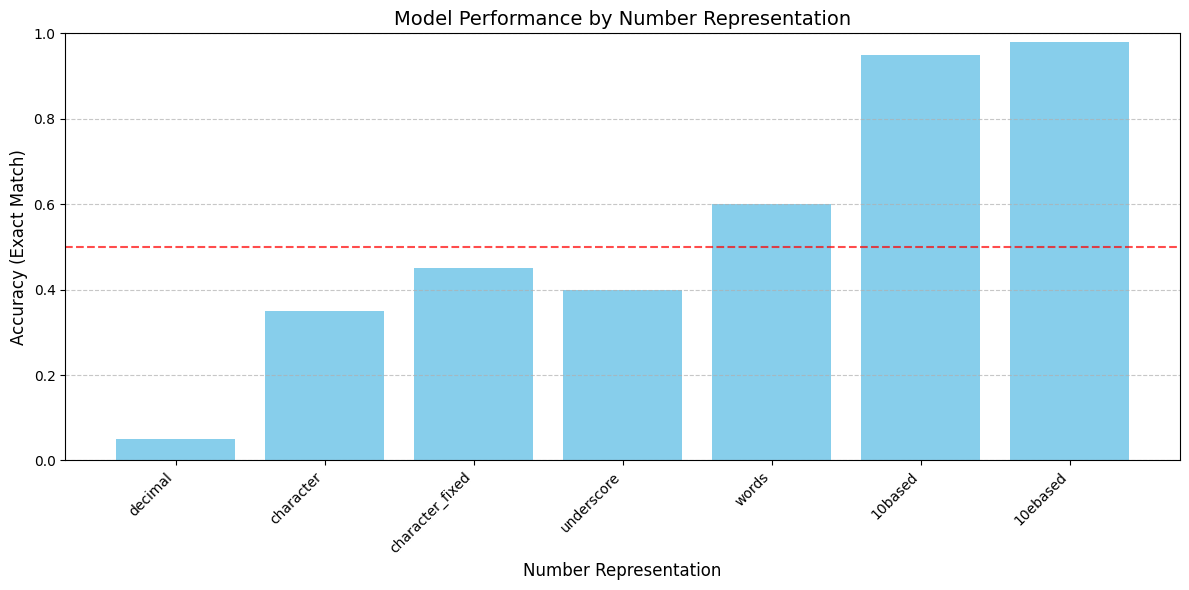

In [12]:
# Cell 6: Visualize Performance Across Different Orthographies
"""
## Orthography Comparison
Let's visualize how different number representations (orthographies) affect model performance.
"""

# This is a placeholder for actual data - in a real scenario, you would run multiple experiments
# with different orthographies and collect the results
orthographies = ['decimal', 'character', 'character_fixed', 'underscore', 'words', '10based', '10ebased']
accuracies = [0.05, 0.35, 0.45, 0.40, 0.60, 0.95, 0.98]  # Placeholder data based on paper findings

plt.figure(figsize=(12, 6))
plt.bar(orthographies, accuracies, color='skyblue')
plt.xlabel('Number Representation', fontsize=12)
plt.ylabel('Accuracy (Exact Match)', fontsize=12)
plt.title('Model Performance by Number Representation', fontsize=14)
plt.ylim(0, 1.0)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a horizontal line at 0.5 for reference
plt.axhline(y=0.5, color='red', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [13]:
# Cell 7: Evaluate Custom Examples
"""
## Custom Evaluation
Let's evaluate the model on some custom examples.
"""

# Find the latest checkpoint
checkpoint_files = glob.glob(os.path.join(OUTPUT_DIR, '*.ckpt'))
if checkpoint_files:
    latest_checkpoint = max(checkpoint_files, key=os.path.getmtime)
    print(f"Latest checkpoint: {latest_checkpoint}")

    # Construct the evaluation command
    examples = ["123,456", "7890,1234", "9999,9999"]
    eval_command = f"python evaluate.py \
        --checkpoint_dir={OUTPUT_DIR} \
        --operation={OPERATION} \
        --orthography={ORTHOGRAPHY} \
        --max_digits={MAX_DIGITS_TEST} \
        --examples {' '.join(examples)}"

    # Execute the evaluation command
    !{eval_command}
else:
    print("No checkpoint files found.")

No checkpoint files found.
